In [1]:
import sys
import numpy as np
from math import exp
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

100%|██████████| 60/60 [00:33<00:00,  1.79it/s]



The cutoff currents are as follows:
I1 = 0.03 microA/mm^2
I2 = 0.06 microA/mm^2
I3 = 0.45 microA/mm^2


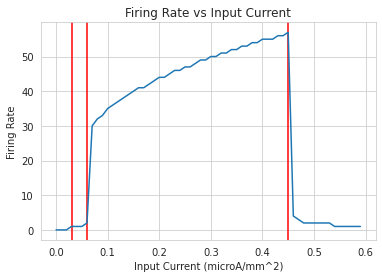

In [2]:
# finding the threshold values
sns.set_style("whitegrid")

def find_peaks(vhist):
  threshold = 10
  npeaks = 0
  for i in range(vhist.size-1):
    if (vhist[i] >= threshold) and (vhist[i] > vhist[i+1]) and (vhist[i] > vhist[i-1]):
      npeaks += 1
  return	npeaks

def get_currents(npeaks_hist):
  for i in range(npeaks_hist.size-1):
    if npeaks_hist[i] > 0 and npeaks_hist[i-1] == 0:
      I1 = i
    if npeaks_hist[i+1]-npeaks_hist[i] > 4:
      I2 = i
    if npeaks_hist[i+1]-npeaks_hist[i] < -2:
      I3 = i
  return	I1, I2, I3
  
current_range = np.arange(0, 0.6, 0.01)
npeaks_hist = np.zeros(current_range.shape)

for curr_iter in tqdm(range(current_range.size)):
  gkmax = 0.36
  vk = -77
  gnamax = 1.20
  vna = 50
  gl = 0.003
  vl = -54.387
  cm = 0.01
  
  dt = 0.01
  niter = 50000
  t = np.arange(1, niter, dt)
  
  v = -64.9964
  m = 0.0530
  h = 0.5960
  n = 0.3177
  
  gnahist = np.zeros((niter))
  gkhist = np.zeros((niter))
  vhist = np.zeros((niter))
  mhist = np.zeros((niter))
  hhist = np.zeros((niter))
  nhist = np.zeros((niter))
  
  for iteration in range(niter):
    gna = gnamax*m**3*h
    gk = gkmax*n**4
    gtot = gna+gk+gl
    vinf = ((gna*vna+gk*vk+gl*vl) + current_range[curr_iter])/gtot
    tauv = cm/gtot
    
    v = vinf+(v-vinf)*exp(-dt/tauv)
    
    alpham = 0.1*(v+40)/(1-exp(-(v+40)/10))
    betam = 4*exp(-0.0556*(v+65))
    
    alphan = 0.01*(v+55)/(1-exp(-(v+55)/10))
    betan = 0.125*exp(-(v+65)/80)
    
    alphah = 0.07*exp(-0.05*(v+65))
    betah = 1/(1+exp(-0.1*(v+35)))
    
    taum = 1/(alpham+betam)
    tauh = 1/(alphah+betah)
    taun = 1/(alphan+betan)
    
    minf = alpham*taum
    hinf = alphah*tauh
    ninf = alphan*taun
    
    m = minf+(m-minf)*exp(-dt/taum)
    h = hinf+(h-hinf)*exp(-dt/tauh)
    n = ninf+(n-ninf)*exp(-dt/taun)
    
    vhist[iteration] = v
    mhist[iteration] = m
    hhist[iteration] = h
    nhist[iteration] = n
      
  #counting peaks
  npeaks = find_peaks(vhist)
  npeaks_hist[curr_iter] = npeaks
  
  
I1, I2, I3 = get_currents(npeaks_hist)
print("\nThe cutoff currents are as follows:")
print("I1 =", current_range[I1], "microA/mm^2")
print("I2 =", current_range[I2], "microA/mm^2")
print("I3 =", current_range[I3], "microA/mm^2")

plt.figure()
plt.axvline(x=current_range[I1], color="r")
plt.axvline(x=current_range[I2], color="r")
plt.axvline(x=current_range[I3], color="r")
plt.plot(current_range, npeaks_hist)
plt.title("Firing Rate vs Input Current")
plt.xlabel("Input Current (microA/mm^2)")
plt.ylabel("Firing Rate")
plt.show()

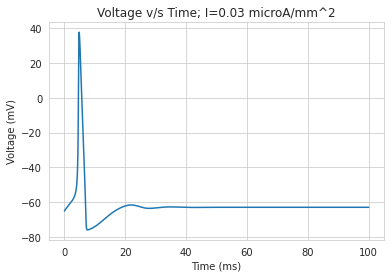

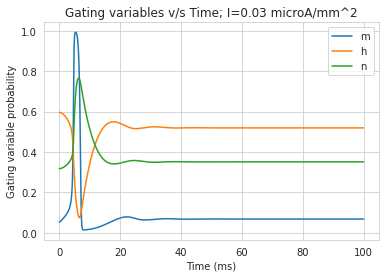

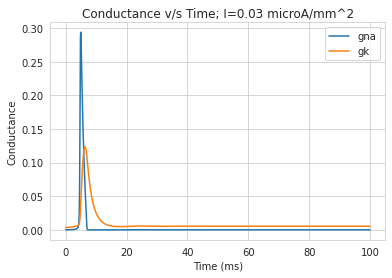

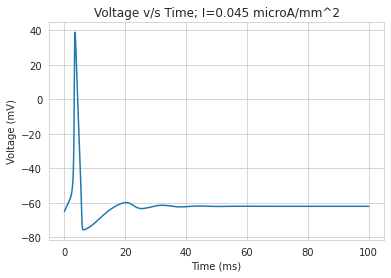

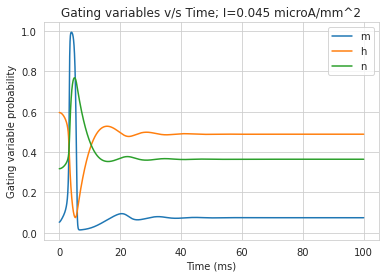

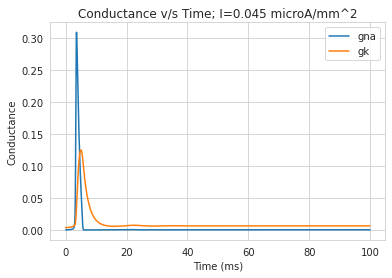

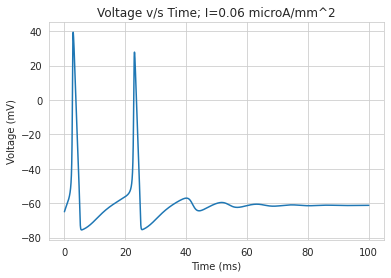

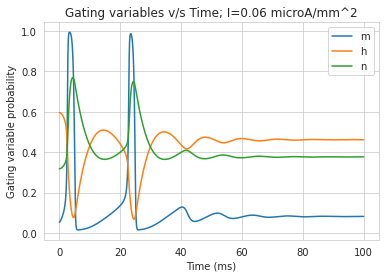

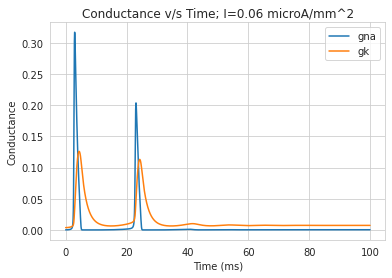

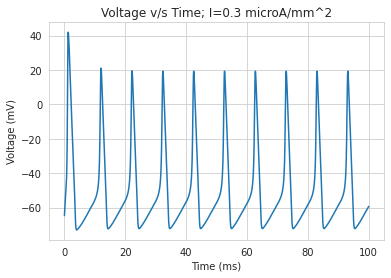

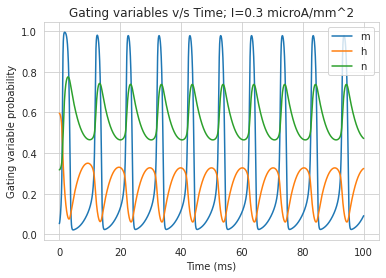

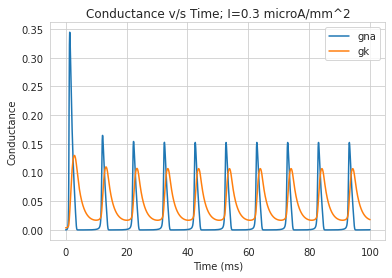

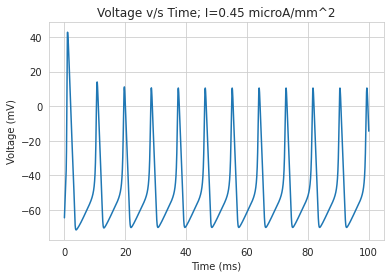

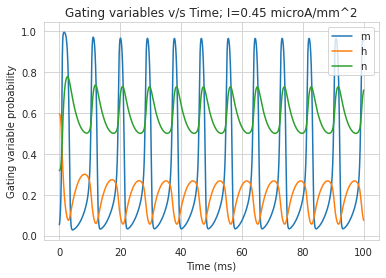

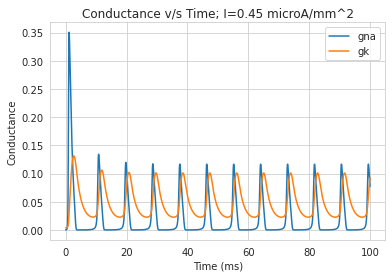

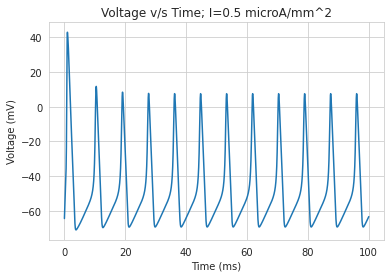

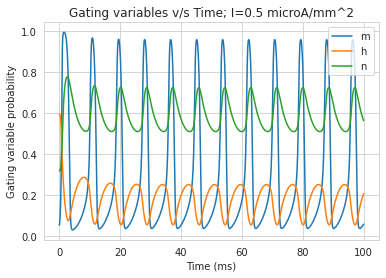

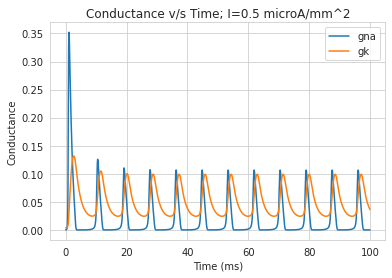

In [5]:
# Plotting the voltage, gating variable probabilities, and conductance
sns.set_style("whitegrid")

current_range = [0.03, 0.045, 0.06, 0.3, 0.45, 0.5]

for curr_iter in range(len(current_range)):
  gkmax = 0.36
  vk = -77
  gnamax = 1.20
  vna = 50
  gl = 0.003
  vl = -54.387
  cm = 0.01
  
  dt = 0.01
  niter = 10000
  t = np.arange(0,niter)*dt
  
  v = -64.9964
  m = 0.0530
  h = 0.5960
  n = 0.3177
  
  gnahist = np.zeros((niter))
  gkhist = np.zeros((niter))
  vhist = np.zeros((niter))
  mhist = np.zeros((niter))
  hhist = np.zeros((niter))
  nhist = np.zeros((niter))
  
  
  for iteration in range(niter):
    gna = gnamax*m**3*h
    gk = gkmax*n**4
    gtot = gna+gk+gl
    vinf = ((gna*vna+gk*vk+gl*vl) + current_range[curr_iter])/gtot
    tauv = cm/gtot
    
    v = vinf+(v-vinf)*exp(-dt/tauv)
    
    alpham = 0.1*(v+40)/(1-exp(-(v+40)/10))
    betam = 4*exp(-0.0556*(v+65))
    
    alphan = 0.01*(v+55)/(1-exp(-(v+55)/10))
    betan = 0.125*exp(-(v+65)/80)
    
    alphah = 0.07*exp(-0.05*(v+65))
    betah = 1/(1+exp(-0.1*(v+35)))
    
    taum = 1/(alpham+betam)
    tauh = 1/(alphah+betah)
    taun = 1/(alphan+betan)
    
    minf = alpham*taum
    hinf = alphah*tauh
    ninf = alphan*taun
    
    m = minf+(m-minf)*exp(-dt/taum)
    h = hinf+(h-hinf)*exp(-dt/tauh)
    n = ninf+(n-ninf)*exp(-dt/taun)
    
    vhist[iteration] = v
    mhist[iteration] = m
    hhist[iteration] = h
    nhist[iteration] = n
    
    
  plt.figure()
  plt.plot(t, vhist)
  str1 = "Voltage v/s Time; I=" + str(current_range[curr_iter]) + " microA/mm^2"
  plt.title(str1)
  plt.xlabel("Time (ms)")
  plt.ylabel("Voltage (mV)") 
  
  plt.figure()
  plt.plot(t, mhist)
  plt.plot(t, hhist)
  plt.plot(t, nhist)
  plt.legend(['m','h','n'])
  str2 = "Gating variables v/s Time; I=" + str(current_range[curr_iter]) + " microA/mm^2"
  plt.title(str2)
  plt.xlabel("Time (ms)")
  plt.ylabel("Gating variable probability") 
  
  plt.figure()
  gna = gnamax*(mhist**3)	*hhist
  gk = gkmax*nhist**4
  plt.plot(t, gna)
  plt.plot(t, gk)
  plt.legend(['gna','gk'])
  str3 = "Conductance v/s Time; I=" + str(current_range[curr_iter]) + " microA/mm^2"
  plt.title(str3)
  plt.xlabel("Time (ms)")
  plt.ylabel("Conductance") 
  
plt.show()
print('\n')